# In order to Run a cell, just press <span style="color:blue"> shift+enter.</span>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Run the followig code to upload data #
data = np.loadtxt("./ex1data1.txt", delimiter=',')

# This command shows the shape of the data
data.shape

(97, 2)

### Plotting the Data
Before starting on any task, it is often useful to understand the data by visualizing it. For this dataset, you can use a scatter plot to visualize the data, since it has only two properties to plot (profit and population). (Many other problems that you will encounter in real life are multi-dimensional and can’t be plotted on a 2-d plot.)

### Run the following cell to visualize the data points


Text(0.5, 1.0, 'Profit Vs Population')

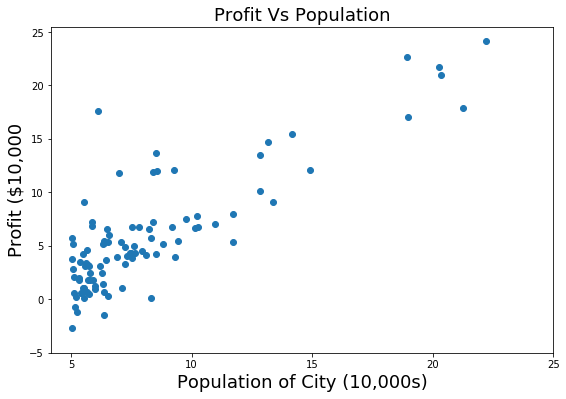

In [4]:
plt.figure(figsize=(9,6))

########################
#  Start of your code  #

# Use matplotlib scatter plot function to plot profit versus population
plt.scatter(data[:,0],data[:,1])


#   end  of your code  #
########################

plt.xticks(np.arange(5,30,step=5))
plt.yticks(np.arange(-5,30,step=5))
plt.xlabel("Population of City (10,000s)" , fontsize=18 )
plt.ylabel("Profit ($10,000", fontsize=18)
plt.title("Profit Vs Population", fontsize=18)

## Cost function

The objective of linear regression is to minimize the cost function

$ J(\theta_0 , \theta_1) = \frac{1}{2m} \Sigma_{i=1}^m (h_\theta(x^{(i)} - y^{(i)} )^2$

where the hypothesis $h_\theta(x)$ is given by the linear model

$h_\theta(x) = x \theta  = \theta_0 + \theta_1 x_1$



In [7]:
def computeCost(X,y,theta):
    """
    Take in a numpy array X,y, theta and generate the cost function     of using theta as parameter in a linear regression model
    """
    ########################
    #  Start of your code  #
    
    # find the number of the trainig set and set it to m
    m = data.shape[0]

    
    # Use the Normal equation to calculate the hypothesis 
    hypothesis = X.dot(theta)
    
    # Calculate the cost function and set it to J. You can use np.sum to sum over different data points
    J =  1/(2*m) * np.sum((hypothesis - y)**2)
    
    #   end  of your code  #
    ########################
    
    return J



Once you have completed the function, the next step will run computeCost once using $\theta$ initialized to zeros, and you will see the cost printed to the screen.
You should expect to see   <span style="color:blue"> a cost of 32.07</span>.


In [8]:

########################
#  Start of your code  #

# find the number of the trainig set and set it to m
m = data.shape[0]

# Add a column of 1's to the training_set and name it X (np.append can be useful here)
X = np.append(np.ones((m,1)),data[:,0].reshape(m,1),axis=1)

# Choose the last column as labels and asign it to y
y = data[:,1].reshape(m,1)

# Initiate theta as a (2,1) zero vector (np.zerose can be useful here)
theta = np.zeros((2,1))

# Calculate costfunction by the using computeCost defined above(your resut should be around 32.07)
computeCost(X,y,theta)
#   end  of your code  #
########################

32.072733877455676

## Gradient Descent
In this part, you will fit the linear regression parameters θ to our dataset using gradient descent.

Recall that the parameters of your model are the $\theta_j$ values. These are the values you will adjust to minimize cost $ J(\theta)$. One way to do this is to use the batch gradient descent algorithm. In batch gradient descent, each iteration performs the update

$\theta_j := \theta_j - \alpha \frac{1 }{m} \Sigma_{i=1}^m (h_\theta(x^{(i)} )- y^{(i)}) ~ x^{(i)}_j$ $~~$ ( Eq. 2 )

With each step of gradient descent, your parameters $\theta_j$ come closer to the optimal values that will achieve the lowest cost $J(\theta)$.

Next, you will implement gradient descent in the following cell. The loop structure has been written for you, and you only need to supply the updates to $\theta$ within each iteration.
As you program, make sure you understand what you are trying to optimize and what is being updated. Keep in mind that the cost $J(\theta)$ is parameterized by the vector $\theta$, not X and y. That is, we minimize the value of $J(\theta)$ by changing the values of the vector $\theta$, not by changing X or y.

In [9]:
def gradientDescent(X,y,theta,alpha,num_iters):
    """
    Take in numpy array X, y and theta and update theta by taking   num_iters gradient steps
    with learning rate of alpha
    
    return theta and the list of the cost of theta during each  iteration
    """
    
########################
#  Start of your code  #
    
    # find the number of the trainig set and set it to m
    m = data.shape[0]
    J_history=[]
    
    for i in range(num_iters):
        
        # Use the product of X and theta to calculate the hypothesis 
        hypothesis = X.dot(theta)
        
        # Calculate the derivative of cost function (Which is the second term in Eq.2)
        # Note that you can use matrix products insted of using sumation
        cost_deriv = np.dot(X.transpose(),(hypothesis -y))
        
        # Update the values of theta using Eq.2
        theta = theta - alpha * 1/m * cost_deriv
        
        # Use computeCost to calculate the cost function and append it to the J_history list
        J_history.append(computeCost(X,y,theta))
    
    return theta, J_history

# Calculate theta and J_history for theta=0.01 and num_iter = 1500 by gradientDescent defined above
theta,J_history = gradientDescent(X,y,theta,0.01,1500)

#   end  of your code  #
########################

print("h(x) ="+str(round(theta[0,0],2))+" + "+str(round(theta[1,0],2))+"x1")

h(x) =-3.63 + 1.17x1


A good way to verify that gradient descent is working correctly is to look at the value of J(θ) and check that it is decreasing with each step. Assuming you have implemented gradient descent and computeCost correctly, your value of J(θ) should never increase, and should converge to a steady value by the end of the algorithm.

### Run the following cell to plot J_history for differnet iterations

Text(0.5, 1.0, 'Cost function using Gradient Descent')

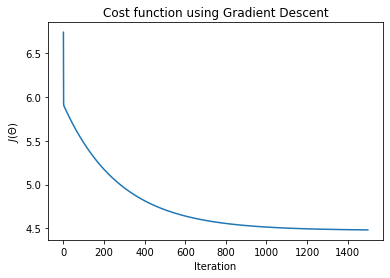

In [10]:
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

**Now that you have $\theta_0$ and $\theta_1$ after 1500 iterations, use them to calculate y and plot best fit line that goes through data points. For this you can calculate y at two optional points (e.g. x1=4 and x2=25) and by using plt.plot, you can plot the line that match (x1, y1) to (x2, y2)**

Text(0.5, 1.0, 'Profit vs Population')

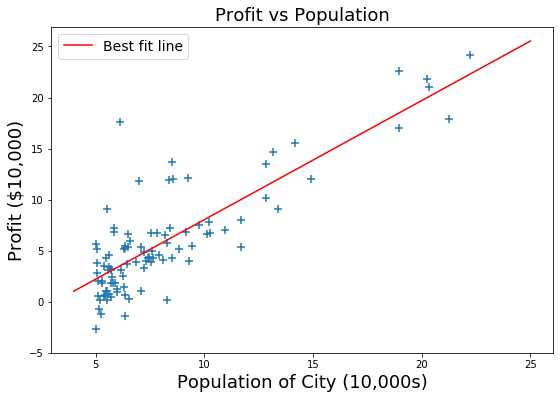

In [11]:
plt.figure(figsize=(9,6))
plt.scatter(data[:,0],data[:,1], marker='+', s=75)
x_value=[4,25]
y_value=[theta[0] + x*theta[1] for x in x_value]
plt.plot(x_value,y_value,color="r", label='Best fit line')
plt.xticks(np.arange(5,30,step=5))
plt.yticks(np.arange(-5,30,step=5))
plt.xlabel("Population of City (10,000s)", fontsize=18)
plt.ylabel("Profit ($10,000)", fontsize=18)
plt.legend(fontsize=14)
plt.title("Profit vs Population", fontsize=18)

### Define a function and name it predict which uses the learned parameters, $\theta$ and predict the expected profit.

In [12]:
def predict(x,theta):
    """
    Takes in numpy array of x and theta and return the predicted value of y based on theta
    """
########################
#  Start of your code  #

    hypothesis= np.dot(x, theta)
    
    return hypothesis[0]

#   end  of your code  #
########################


**Predict profits for two cities with populations of 35000 and 70000. Note that you should use 3.5 and 7 
in your calculations as data is provided in 10000s unit**

In [13]:
predict1 = predict(np.array([1,3.5]),theta)*10000
print("For population = 35,000, we predict a profit of $"+str(round(predict1,0)))

For population = 35,000, we predict a profit of $4520.0


In [14]:
predict2=predict(np.array([1,7]),theta)*10000
print("For population = 70,000, we predict a profit of $"+str(round(predict2,0)))

For population = 70,000, we predict a profit of $45342.0
